In [3]:
! wget https://www.dropbox.com/s/ggl9krhh6dcwhhz/train.csv

--2026-01-11 09:44:15--  https://www.dropbox.com/s/ggl9krhh6dcwhhz/train.csv
Resolving www.dropbox.com (www.dropbox.com)... 162.125.1.18, 2620:100:601c:18::a27d:612
Connecting to www.dropbox.com (www.dropbox.com)|162.125.1.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.dropbox.com/scl/fi/ro6q2frmfjfbun9oymil5/train.csv?rlkey=e1u0uewwi0zlg0g2fqdrg30ks [following]
--2026-01-11 09:44:15--  https://www.dropbox.com/scl/fi/ro6q2frmfjfbun9oymil5/train.csv?rlkey=e1u0uewwi0zlg0g2fqdrg30ks
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc68ecbf3e5fb0b28862efcabdf2.dl.dropboxusercontent.com/cd/0/inline/C4yWxOFobA9Kw484TwvN-5jIzdj-HIntXdhE5E8FvHuV32j1GYQGI6nQkT2hVRpofycvxOywiilIOn5YrZytN9bChUqQtGRuE7FX091W20DRSW8shxl2lJ7nJnYf5hWOraI/file# [following]
--2026-01-11 09:44:16--  https://uc68ecbf3e5fb0b28862efcabdf2.dl.dropboxusercontent.com/cd/0/inline/C4yWxOFobA9Kw484TwvN-5jIzdj-HIn

In [4]:
! wget https://www.dropbox.com/s/ggl9krhh6dcwhhz/test.csv

--2026-01-11 09:44:18--  https://www.dropbox.com/s/ggl9krhh6dcwhhz/test.csv
Resolving www.dropbox.com (www.dropbox.com)... 162.125.6.18, 2620:100:6016:18::a27d:112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.6.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.dropbox.com/scl/fi/ro6q2frmfjfbun9oymil5/test.csv?rlkey=e1u0uewwi0zlg0g2fqdrg30ks [following]
--2026-01-11 09:44:19--  https://www.dropbox.com/scl/fi/ro6q2frmfjfbun9oymil5/test.csv?rlkey=e1u0uewwi0zlg0g2fqdrg30ks
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc683d8b7a655cbcc42c95086a58.dl.dropboxusercontent.com/cd/0/inline/C4wi6rTVvEUdmhCnpaz0veAjV2RKPVt1JNJ10DeYELpofalUMadxIzhg2Uy-CO7dmrMy9hfTXoOZaT9nHvKzclrUFcOSYTMf8Ew_wXpBjZ77DI5HlhY38sQ9Zf5EjvmfyHQ/file# [following]
--2026-01-11 09:44:19--  https://uc683d8b7a655cbcc42c95086a58.dl.dropboxusercontent.com/cd/0/inline/C4wi6rTVvEUdmhCnpaz0veAjV2RKPVt1JN

In [1]:
import pandas as pd
df = pd.read_csv("train.csv")

In [2]:
df

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
159566,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0,0,0,0,0,0
159567,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0
159568,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0
159569,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0


In [3]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"


In [4]:
df = df[['comment_text', 'toxic']].copy()
df['toxic'] = df['toxic'].astype(int)

df['toxic'].value_counts()

0    144277
1     15294
Name: toxic, dtype: int64

In [5]:
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab') # Added this line to download the 'punkt_tab' resource

stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = text.lower()
    text = re.sub(r'\n', ' ', text)
    text = re.sub(r'\d+', '', text)
    text = text.translate(str.maketrans('', '', string.punctuation))

    tokens = word_tokenize(text)
    tokens = [w for w in tokens if w not in stop_words]

    return " ".join(tokens)

df['clean_text'] = df['comment_text'].apply(clean_text)

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/24n0457/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/24n0457/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /home/24n0457/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(
    max_features=1000,
    max_df=0.95,
    min_df=5,
    ngram_range=(1, 2)
)

X_tfidf = tfidf.fit_transform(df['clean_text'])
y = df['toxic']



In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_tfidf, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)


In [8]:
import numpy as np
def text_stats(text):
    return {
        "char_len": len(text),
        "word_len": len(text.split()),
        "avg_word_len": np.mean([len(w) for w in text.split()]) if len(text.split()) > 0 else 0,
        "unique_word_ratio": len(set(text.split())) / (len(text.split()) + 1)
    }

stats_df = df['clean_text'].apply(text_stats).apply(pd.Series)


In [9]:
def style_features(text):
    return {
        "exclamation_count": text.count("!"),
        "question_count": text.count("?"),
        "uppercase_ratio": sum(1 for c in text if c.isupper()) / (len(text) + 1)
    }

style_df = df['comment_text'].apply(style_features).apply(pd.Series)


In [10]:
profanity_words = [
    "fuck", "shit", "bitch", "asshole", "idiot",
    "stupid", "dumb", "moron", "bastard"
]

def profanity_features(text):
    tokens = text.lower().split()
    return {
        "profanity_count": sum(1 for w in tokens if w in profanity_words),
        "has_profanity": int(any(w in profanity_words for w in tokens))
    }

profanity_df = df['clean_text'].apply(profanity_features).apply(pd.Series)


In [11]:
from nltk.sentiment import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

sia = SentimentIntensityAnalyzer()

def sentiment_features(text):
    score = sia.polarity_scores(text)
    return {
        "sent_neg": score["neg"],
        "sent_neu": score["neu"],
        "sent_pos": score["pos"],
        "sent_compound": score["compound"]
    }

sentiment_df = df['clean_text'].apply(sentiment_features).apply(pd.Series)


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/24n0457/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [12]:
engineered_features = pd.concat(
    [stats_df, style_df, profanity_df, sentiment_df],
    axis=1
)


In [13]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
engineered_scaled = scaler.fit_transform(engineered_features)


In [14]:
from scipy.sparse import hstack

X_final = hstack([X_tfidf, engineered_scaled])
y = df['toxic']


In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_final,
    y,
    test_size=0.2,
    stratify=y,
    random_state=42
)


In [16]:
X_train

<127656x1013 sparse matrix of type '<class 'numpy.float64'>'
	with 3684874 stored elements in Compressed Sparse Row format>

In [17]:
engineered_features

,char_len,word_len,avg_word_len,unique_word_ratio,exclamation_count,question_count,uppercase_ratio,profanity_count,has_profanity,sent_neg,sent_neu,sent_pos,sent_compound
0,173.0,26.0,5.692308,0.962963,0.0,1.0,0.064151,0,0,0.000,0.839,0.161,0.5574
1,73.0,11.0,5.727273,0.916667,1.0,0.0,0.070796,0,0,0.144,0.647,0.209,0.2263
2,144.0,22.0,5.590909,0.956522,0.0,0.0,0.017094,0,0,0.152,0.731,0.117,-0.2415
3,377.0,49.0,6.714286,0.900000,0.0,0.0,0.017657,0,0,0.083,0.797,0.120,0.2500
4,35.0,6.0,5.000000,0.857143,0.0,1.0,0.029412,0,0,0.000,0.417,0.583,0.6808
...,...,...,...,...,...,...,...,...,...,...,...,...,...
159566,186.0,24.0,6.791667,0.920000,0.0,2.0,0.006757,0,0,0.168,0.613,0.219,0.1548
159567,36.0,6.0,5.166667,0.857143,0.0,0.0,0.020000,0,0,0.623,0.377,0.000,-0.7650
159568,66.0,9.0,6.444444,0.900000,0.0,0.0,0.048780,0,0,0.000,1.000,0.000,0.0000
159569,57.0,9.0,5.444444,0.900000,0.0,0.0,0.017094,0,0,0.000,0.762,0.238,0.3612


In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

model = Sequential([
    Dense(256, activation="relu", input_shape=(X_train.shape[1],)),
    Dropout(0.4),

    Dense(128, activation="relu"),
    Dropout(0.3),

    Dense(64, activation="relu"),
    Dropout(0.2),

    Dense(1, activation="sigmoid")
])

model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

model.summary()


2026-01-11 15:49:52.415643: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
/home/24n0457/.local/lib/python3.9/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2026-01-11 15:49:59.974110: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2026-01-11 15:49:59.974157: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:160] env: CUDA_VISIBLE_DEVICES="-1

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 256)            │       259,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 300,801 (1.15 MB)

 Trainable params: 300,801 (1.15 MB)

 Non-trainable params: 0 (0.00 B)

In [19]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

class_weights = compute_class_weight(
    class_weight="balanced",
    classes=np.unique(y_train),
    y=y_train
)

class_weight_dict = dict(zip(np.unique(y_train), class_weights))
class_weight_dict


{0: 0.5530016201557776, 1: 5.21683694319575}

In [20]:
history = model.fit(
    X_train.toarray(),
    y_train,
    validation_split=0.1,
    epochs=6,
    batch_size=256,
    class_weight=class_weight_dict,
    verbose=1
)


Epoch 1/6
449/449 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8183 - loss: 0.4064 - val_accuracy: 0.8838 - val_loss: 0.2822
Epoch 2/6
449/449 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8901 - loss: 0.2745 - val_accuracy: 0.8993 - val_loss: 0.2412
Epoch 3/6
449/449 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8922 - loss: 0.2500 - val_accuracy: 0.8854 - val_loss: 0.2576
Epoch 4/6
449/449 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8936 - loss: 0.2303 - val_accuracy: 0.8885 - val_loss: 0.2272
Epoch 5/6
449/449 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8998 - loss: 0.2093 - val_accuracy: 0.8874 - val_loss: 0.2347
Epoch 6/6
449/449 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9072 - loss: 0.1863 - val_accuracy: 0.8915 - val_loss: 0.2509


In [21]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = (model.predict(X_test.toarray()) > 0.5).astype(int)

print(classification_report(y_test, y_pred))


998/998 ━━━━━━━━━━━━━━━━━━━━ 1s 614us/step
              precision    recall  f1-score   support

           0       0.98      0.90      0.94     28856
           1       0.48      0.85      0.62      3059

    accuracy                           0.90     31915
   macro avg       0.73      0.88      0.78     31915
weighted avg       0.94      0.90      0.91     31915



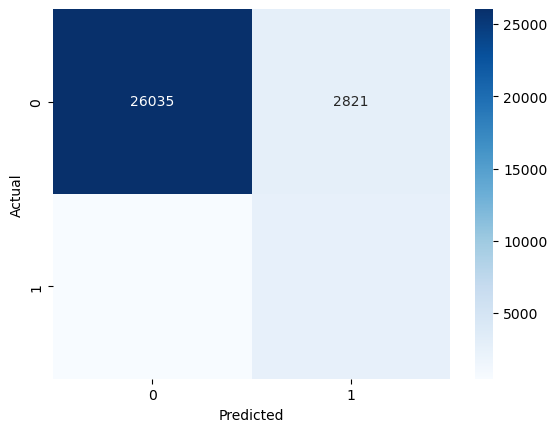

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.heatmap(
    confusion_matrix(y_test, y_pred),
    annot=True,
    fmt="d",
    cmap="Blues"
)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [23]:
y_pred_proba = model.predict(X_test.toarray()).ravel()


998/998 ━━━━━━━━━━━━━━━━━━━━ 1s 562us/step


In [24]:
from sklearn.metrics import roc_auc_score

auc_score = roc_auc_score(y_test, y_pred_proba)
print("ROC-AUC:", auc_score)


ROC-AUC: 0.9467382105351976


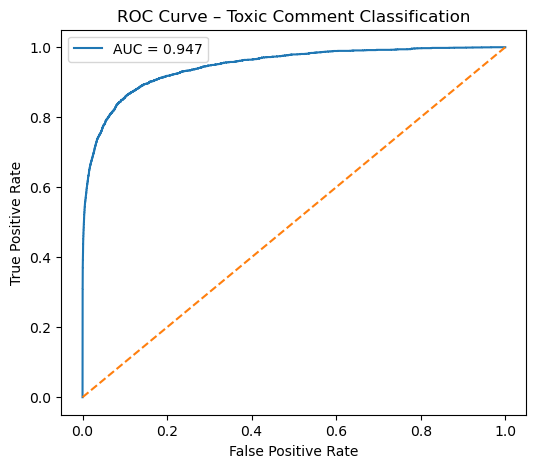

In [25]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f"AUC = {auc_score:.3f}")
plt.plot([0,1], [0,1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve – Toxic Comment Classification")
plt.legend()
plt.show()


In [26]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

j_scores = tpr - fpr
best_idx = j_scores.argmax()
best_threshold_roc = thresholds[best_idx]

best_threshold_roc


0.45664933

In [27]:
from sklearn.metrics import precision_recall_curve

precision, recall, pr_thresholds = precision_recall_curve(
    y_test, y_pred_proba
)

f1_scores = 2 * (precision * recall) / (precision + recall + 1e-8)
best_idx_pr = f1_scores.argmax()
best_threshold_pr = pr_thresholds[best_idx_pr]

best_threshold_pr


0.8859388

In [28]:
print("ROC-based threshold:", best_threshold_roc)
print("PR/F1-based threshold:", best_threshold_pr)


ROC-based threshold: 0.45664933
PR/F1-based threshold: 0.8859388


In [29]:
custom_threshold = 0.44418246  # choose PR-based

y_pred_custom = (y_pred_proba >= custom_threshold).astype(int)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_custom))


              precision    recall  f1-score   support

           0       0.98      0.89      0.94     28856
           1       0.46      0.87      0.60      3059

    accuracy                           0.89     31915
   macro avg       0.72      0.88      0.77     31915
weighted avg       0.93      0.89      0.90     31915



In [30]:
custom_threshold = 0.85705435  # choose PR-based

y_pred_custom = (y_pred_proba >= custom_threshold).astype(int)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_custom))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97     28856
           1       0.74      0.69      0.72      3059

    accuracy                           0.95     31915
   macro avg       0.86      0.83      0.84     31915
weighted avg       0.95      0.95      0.95     31915



In [31]:
HIGH_THRESHOLD = 0.86


In [32]:
y_pred_high = (y_pred_proba >= HIGH_THRESHOLD).astype(int)


In [33]:
eval_df = df.iloc[y_test.index].copy()

eval_df["y_true"] = y_test.values
eval_df["y_proba"] = y_pred_proba
eval_df["y_pred"] = y_pred_high


In [34]:
false_positives = eval_df[
    (eval_df["y_true"] == 0) & (eval_df["y_pred"] == 1)
]

false_positives.head()


,comment_text,toxic,clean_text,y_true,y_proba,y_pred
106608,"""\n\n Your comments on the """"Islam and blasphe...",0,comments islam blasphemy discussion page sir u...,0,0.870648,1
59533,REALLY MAKE ME SCARED AND MAD AT SONY\n IM CSI,0,really make scared mad sony im csi,0,0.988240,1
84704,D.O.A. - The Foo Fighters,0,doa foo fighters,0,0.957409,1
118646,"""\n i didn't sign anything or agree to anythin...",0,didnt sign anything agree anything stated im g...,0,0.887385,1
11370,Tommy Doom\nsome idiot put Tommy Doom instead ...,0,tommy doom idiot put tommy doom instead actual...,0,0.875154,1


In [35]:
false_negatives = eval_df[
    (eval_df["y_true"] == 1) & (eval_df["y_pred"] == 0)
]

false_negatives.head()


,comment_text,toxic,clean_text,y_true,y_proba,y_pred
32287,"""\n\nThe dick who is editing with policy is al...",1,dick editing policy also editing policy arroga...,1,0.838219,0
56924,Even if I'm leaving this bullshit of Wikipedia...,1,even im leaving bullshit wikipedia forever obs...,1,0.703831,0
156948,""")\n\nTrumpet, I certainly will let someone wh...",1,trumpet certainly let someone whose posts main...,1,0.001061,0
78488,Wikipedia appears to work on the basis that a ...,1,wikipedia appears work basis collective enforc...,1,0.029646,0
1653,No silly it isnt ITS UR MOMS and might I say q...,1,silly isnt ur moms might say quite lovely page...,1,0.533646,0


In [36]:
print("False Positives:", false_positives.shape[0])
print("False Negatives:", false_negatives.shape[0])


False Positives: 706
False Negatives: 946


In [ ]:
import shap
# shap.initjs()


In [ ]:
# Background data (baseline)
X_bg = X_train[:100].toarray()


In [ ]:
# Samples we explain
X_exp = X_test[:30].toarray()


In [ ]:
explainer = shap.KernelExplainer(
    model.predict,
    X_bg
)


In [ ]:
shap_values = explainer.shap_values(X_exp)


In [ ]:
df

In [ ]:
shap

In [ ]:
tfidf_feature_names = tfidf.get_feature_names_out()
engineered_feature_names = engineered_features.columns.tolist()

# Combine all feature names
all_feature_names = list(tfidf_feature_names) + engineered_feature_names

In [ ]:
# SHAP Bar Plot
shap.summary_plot(shap_values.squeeze(), X_exp, feature_names=all_feature_names, plot_type='bar', show=False)
plt.title('SHAP Global Feature Importance (Bar Plot)')
plt.tight_layout()
plt.show()

In [ ]:
# SHAP Bee Swarm Plot
shap.summary_plot(shap_values.squeeze(), X_exp, feature_names=all_feature_names, show=False)
plt.title('SHAP Global Feature Impact (Bee Swarm Plot)')
plt.tight_layout()
plt.show()

### SHAP Force Plot for an Individual Instance

AThe force plot visualizes how features push the model's output from the base value (average prediction) to the final prediction for a specific instance. Features pushing the prediction higher are shown in red, and those pushing it lower are in blue.

In [ ]:
# Select an instance to explain (e.g., the first instance from X_exp)
instance_idx = 0

# The explainer was already created with model.predict and background data X_bg
# shap_values are already computed for X_exp

# Get the SHAP values for the selected instance
shap_values_instance = shap_values.squeeze()[instance_idx]

# Get the feature values for the selected instance
x_instance = X_exp[instance_idx]

# Create a specific explainer for this instance (optional, but good for base value)
# For force plot, we often use the base value from the KernelExplainer
expected_value = explainer.expected_value

# Generate the force plot
shap.force_plot(expected_value, shap_values_instance, x_instance, feature_names=all_feature_names, matplotlib=True, show=False)
plt.title('SHAP Force Plot for an Individual Instance')
plt.tight_layout()
plt.show()

### SHAP Waterfall Plot for an Individual Instance

The waterfall plot is another way to visualize an individual prediction. It shows the SHAP values as an additive sequence, starting from the base value and adding or subtracting feature contributions to arrive at the final output value. It's often clearer for showing the exact path from the base rate to the prediction.

In [ ]:
# Generate the waterfall plot for the same instance
shap.waterfall_plot(shap.Explanation(values=shap_values_instance,
                                    base_values=expected_value,
                                    data=x_instance,
                                    feature_names=all_feature_names), show=False)
plt.title('SHAP Waterfall Plot for an Individual Instance')
plt.tight_layout()
plt.show()

In [ ]:
fp_idx = false_positives.index
fn_idx = false_negatives.index


In [ ]:
X_fp = X_test[y_test.index.isin(fp_idx)].toarray()
X_fn = X_test[y_test.index.isin(fn_idx)].toarray()


In [ ]:
X_fp_sample = X_fp[:20]
X_fn_sample = X_fn[:20]


In [ ]:
shap_fp = explainer.shap_values(X_fp_sample)
shap_fn = explainer.shap_values(X_fn_sample)


In [ ]:
import matplotlib.pyplot as plt
import shap
import numpy as np

# Ensure SHAP JS is initialized for plots that follow
shap.initjs()

# Re-derive FP and FN indices (using the corrected X_test indexing if needed)
# Ensure HIGH_THRESHOLD is defined, if not, define it (as it was in a previous cell)
# HIGH_THRESHOLD = 0.86 # Assuming this value or similar is desired

y_pred_high = (y_pred_proba >= HIGH_THRESHOLD).astype(int)

eval_df = df.iloc[y_test.index].copy()
eval_df["y_true"] = y_test.values
eval_df["y_pred"] = y_pred_high

fp_idx = eval_df[(eval_df["y_true"] == 0) & (eval_df["y_pred"] == 1)].index
fn_idx = eval_df[(eval_df["y_true"] == 1) & (eval_df["y_pred"] == 0)].index

# Use the corrected indexing for X_test (assuming X_test is csr_matrix)
X_fp = X_test[y_test.index.get_indexer(fp_idx)].toarray()
X_fn = X_test[y_test.index.get_indexer(fn_idx)].toarray()

# Sample for SHAP explanation
X_fp_sample = X_fp[:20]
X_fn_sample = X_fn[:20]

# Generate SHAP values for sampled false positives and false negatives
shap_fp = explainer.shap_values(X_fp_sample)
shap_fn = explainer.shap_values(X_fn_sample)

print("SHAP values for False Positives and False Negatives calculated.")

# --- Bee Swarm Plots ---
plt.figure(figsize=(10, 8))
plt.title('SHAP Bee Swarm Plot for False Positives')
shap.summary_plot(shap_fp.squeeze(), X_fp_sample, feature_names=all_feature_names, show=False)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 8))
plt.title('SHAP Bee Swarm Plot for False Negatives')
shap.summary_plot(shap_fn.squeeze(), X_fn_sample, feature_names=all_feature_names, show=False)
plt.tight_layout()
plt.show()

# --- Bar Plots ---
plt.figure(figsize=(10, 8))
plt.title('SHAP Bar Plot for False Positives')
shap.summary_plot(shap_fp.squeeze(), X_fp_sample, feature_names=all_feature_names, plot_type="bar", show=False)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 8))
plt.title('SHAP Bar Plot for False Negatives')
shap.summary_plot(shap_fn.squeeze(), X_fn_sample, feature_names=all_feature_names, plot_type="bar", show=False)
plt.tight_layout()
plt.show()

# --- Force Plots for Individual Instances ---
expected_value = explainer.expected_value

# Force plot for a False Positive instance
idx = 0 # Example index
plt.figure(figsize=(12, 4))
plt.title(f'SHAP Force Plot for FP Instance {idx}')
shap.force_plot(
    expected_value,
    shap_fp.squeeze()[idx],
    X_fp_sample[idx],
    feature_names=all_feature_names, matplotlib=True, show=False
)
plt.tight_layout()
plt.show()

# Force plot for a False Negative instance
plt.figure(figsize=(12, 4))
plt.title(f'SHAP Force Plot for FN Instance {idx}')
shap.force_plot(
    expected_value,
    shap_fn.squeeze()[idx],
    X_fn_sample[idx],
    feature_names=all_feature_names, matplotlib=True, show=False
)
plt.tight_layout()
plt.show()